In [1]:
import numpy as np
import pandas as pd
from minisom import MiniSom
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import seaborn as sns
import copy
import joblib

In [2]:
# Load the dataset from the CSV file
file_path = r'D:\UOM\FYP\Data_gaiya\Dikkapitiya\labled.csv'
df = pd.read_csv(file_path)
df['Time'] = pd.to_datetime(df['Time'], format='%m.%d.%Y %H:%M:%S')

# Create a new DataFrame with the selected columns
selected_columns = ['Time','Power(W)','Temperature(℃)']
df = df[selected_columns]

df_new = copy.deepcopy(df)
df_new['Time'] = pd.to_datetime(df_new['Time'], format='%m.%d.%Y %H:%M:%S')

# df['Time'] = round((df['Time'].astype(np.int64) / 10**18),10)

# Extract datetime components
df['year'] = df['Time'].dt.year
df['month'] = df['Time'].dt.month
df['day'] = df['Time'].dt.day
df['hour'] = df['Time'].dt.hour
df['minute'] = df['Time'].dt.minute
df['second'] = df['Time'].dt.second

df = df.drop(columns=['Time','year','second','month','day'])


df.isna().sum()
df_new.isna().sum()
df.dropna()
df_new.dropna()
print(df.shape)
print(df_new.shape)

print(df_new.head(10))
print(df.head(30))




(59963, 4)
(59963, 3)
                 Time  Power(W)  Temperature(℃)
0 2024-04-23 05:47:36         0            15.4
1 2024-04-23 05:48:39         0            15.7
2 2024-04-23 05:49:30         0            14.9
3 2024-04-23 05:50:36         0            16.9
4 2024-04-23 05:51:38        19            17.6
5 2024-04-23 05:52:39        21            18.1
6 2024-04-23 05:53:40        28            18.5
7 2024-04-23 05:54:41        32            19.0
8 2024-04-23 05:55:42        15            19.3
9 2024-04-23 05:56:43        29            19.5
    Power(W)  Temperature(℃)  hour  minute
0          0            15.4     5      47
1          0            15.7     5      48
2          0            14.9     5      49
3          0            16.9     5      50
4         19            17.6     5      51
5         21            18.1     5      52
6         28            18.5     5      53
7         32            19.0     5      54
8         15            19.3     5      55
9         29        

In [3]:
# Normalize the data
scaler1 = StandardScaler()
df_scaled = scaler1.fit_transform(df.values)

# Save the scaler to a file
joblib.dump(scaler1, 'scaler.joblib')

print(df_scaled)

[[-0.99319896 -2.6106583  -1.7838914   1.01345988]
 [-0.99319896 -2.5757374  -1.7838914   1.07107098]
 [-0.99319896 -2.66885979 -1.7838914   1.12868209]
 ...
 [-0.99253446 -0.35244019  1.67047828  0.89823767]
 [-0.99272432 -0.36408049  1.67047828  0.95584877]
 [-0.99262939 -0.37572079  1.67047828  1.01345988]]


In [4]:
# Create a SOM grid
som = MiniSom(4, 4, df_scaled.shape[1], sigma=1, learning_rate=0.1)


In [5]:
# Train the SOM on the data
som.train_random(df_scaled, 3000)  # Train for 1000 iterations


In [6]:
# Calculate quantization error
qe = som.quantization_error(df_scaled)
print("Quantization Error:", qe)

# Calculate topographic error
te = som.topographic_error(df_scaled)
print("Topographic Error:", te)

Quantization Error: 0.7623048391392454
Topographic Error: 0.0906559044744259


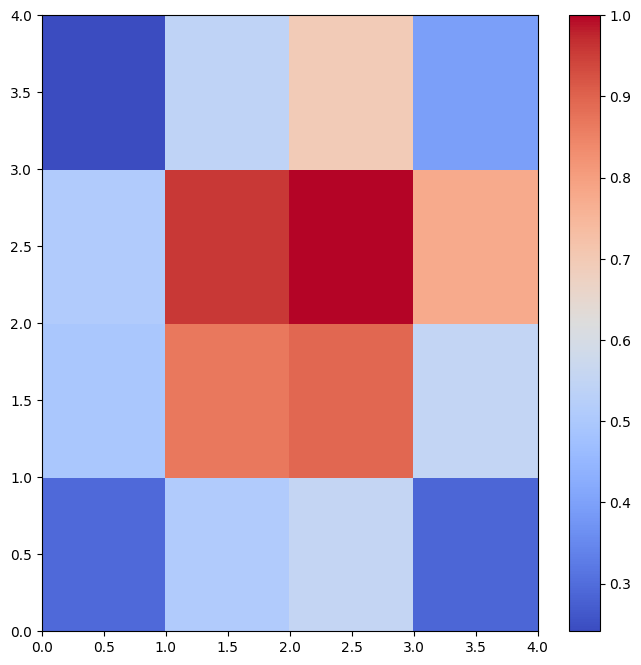

In [7]:
# Visualize the SOM
plt.figure(figsize=(8, 8))
plt.pcolor(som.distance_map().T, cmap='coolwarm')  # Display a heatmap of the SOM's weights
plt.colorbar()
plt.show()

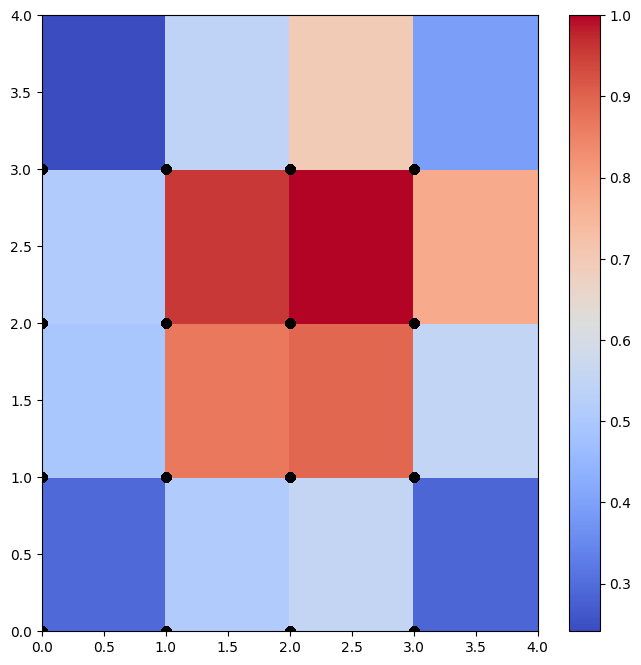

In [8]:
# Map the data onto the trained SOM
mapped_data = np.array([som.winner(d) for d in df_scaled])

# Overlay the original data points onto the visualization
plt.figure(figsize=(8, 8))
plt.pcolor(som.distance_map().T, cmap='coolwarm')
plt.colorbar()
plt.scatter(mapped_data[:, 0], mapped_data[:, 1], c='black', marker='o')
plt.show()

In [9]:
# Assign cluster labels based on SOM grid coordinates
cluster_labels = np.zeros(len(df), dtype=int)
unique_coords, cluster_indices = np.unique(mapped_data, axis=0, return_inverse=True)
cluster_labels = cluster_indices

print(cluster_indices)

[15 15 15 ...  8  8  8]


In [10]:
# Calculate silhouette score
silhouette = silhouette_score(df_scaled, cluster_indices)
print("Silhouette Score:", silhouette)

Silhouette Score: 0.25342251610537986


In [11]:
# Print the labeled data
for i in range(len(df_scaled)):
    print(f"Data point {df_scaled[i]} belongs to cluster {cluster_labels[i]}")


Data point [-0.99319896 -2.6106583  -1.7838914   1.01345988] belongs to cluster 15
Data point [-0.99319896 -2.5757374  -1.7838914   1.07107098] belongs to cluster 15
Data point [-0.99319896 -2.66885979 -1.7838914   1.12868209] belongs to cluster 15
Data point [-0.99319896 -2.4360538  -1.7838914   1.18629319] belongs to cluster 15
Data point [-0.99139531 -2.35457171 -1.7838914   1.2439043 ] belongs to cluster 15
Data point [-0.99120546 -2.29637021 -1.7838914   1.3015154 ] belongs to cluster 15
Data point [-0.99054095 -2.24980901 -1.7838914   1.35912651] belongs to cluster 15
Data point [-0.99016124 -2.19160751 -1.7838914   1.41673761] belongs to cluster 15
Data point [-0.99177503 -2.15668662 -1.7838914   1.47434872] belongs to cluster 15
Data point [-0.99044603 -2.13340602 -1.7838914   1.53195982] belongs to cluster 15
Data point [-0.98845252 -2.09848512 -1.7838914   1.58957092] belongs to cluster 15
Data point [-0.98731338 -2.07520452 -1.7838914   1.64718203] belongs to cluster 15
Data

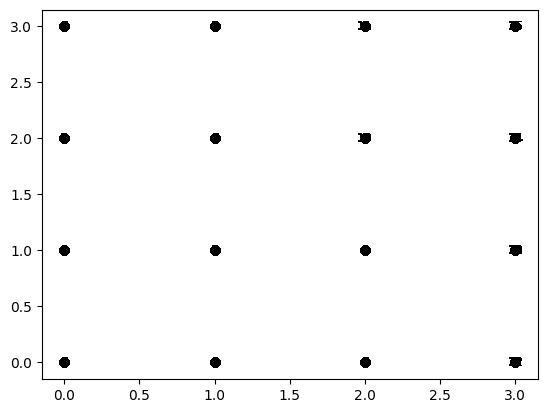

In [12]:
for i, winner in enumerate(mapped_data):
    plt.text(winner[0], winner[1], str(cluster_labels[i]), ha='center', va='center', fontsize=9)

plt.scatter(mapped_data[:, 0], mapped_data[:, 1], c='black', marker='o')
plt.show()

In [13]:
# Assign cluster labels based on SOM grid coordinates
mapped_data = np.array([som.winner(x) for x in df_scaled])
cluster_labels = np.ravel_multi_index(mapped_data.T, (4, 4))  # Convert coordinates to cluster labels

# Add a new column to the original data frame with cluster labels
df_new['Cluster_Labels'] = cluster_labels

# Add a new column to the original data frame with cluster labels
df_new['Cluster_Labels'] = cluster_labels

# Now df contains the original data along with the assigned cluster labels
print(df_new.head(500))

                   Time  Power(W)  Temperature(℃)  Cluster_Labels
0   2024-04-23 05:47:36         0            15.4              15
1   2024-04-23 05:48:39         0            15.7              15
2   2024-04-23 05:49:30         0            14.9              15
3   2024-04-23 05:50:36         0            16.9              15
4   2024-04-23 05:51:38        19            17.6              15
..                  ...       ...             ...             ...
495 2024-04-23 14:20:06     30845            53.0               2
496 2024-04-23 14:21:08     30927            53.1               2
497 2024-04-23 14:22:10     25624            53.1               1
498 2024-04-23 14:23:13     23886            53.1               5
499 2024-04-23 14:24:15     29945            53.0               1

[500 rows x 4 columns]


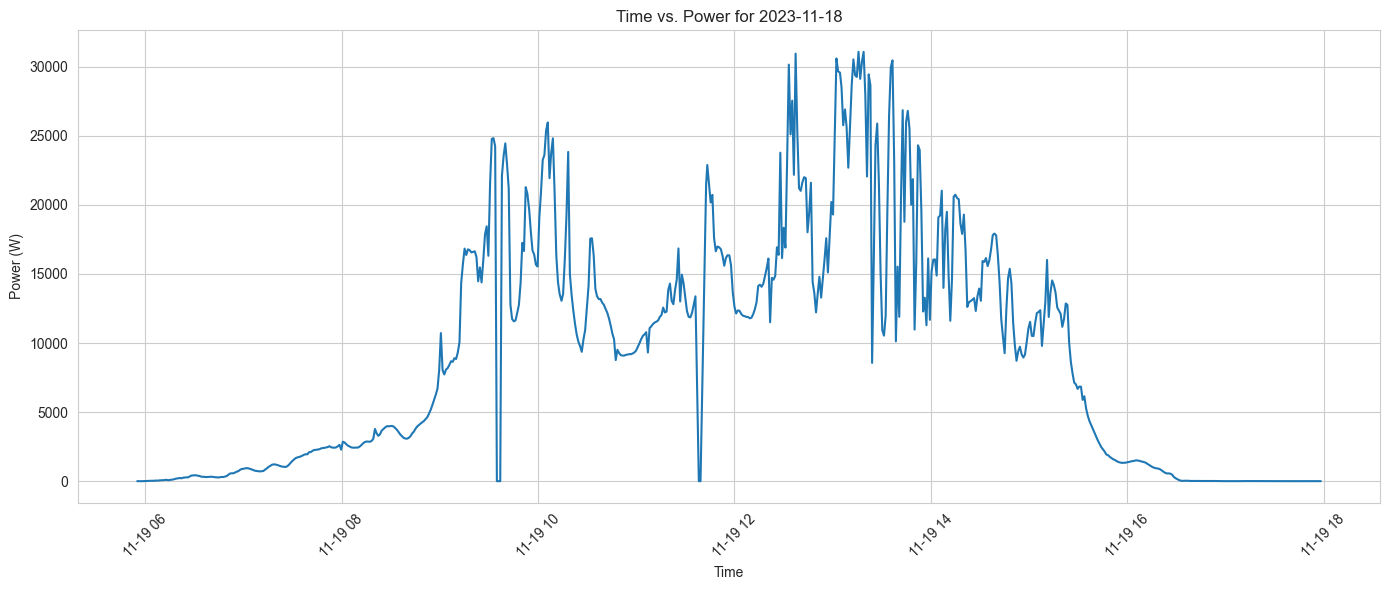

In [336]:
import matplotlib.pyplot as plt

# Assuming 'Time' column is already in datetime format
specific_date = '2023-11-19'

# Filter data for a specific date, for example, '2023-11-16'
specific_date_data = df_new[df_new['Time'].dt.date == pd.to_datetime(specific_date).date()]

# Plot time vs power
plt.figure(figsize=(14, 6))
plt.plot(specific_date_data['Time'], specific_date_data['Power(W)'])

# Set labels and title
plt.xlabel("Time")
plt.ylabel("Power (W)")
plt.title("Time vs. Power for 2023-11-18")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


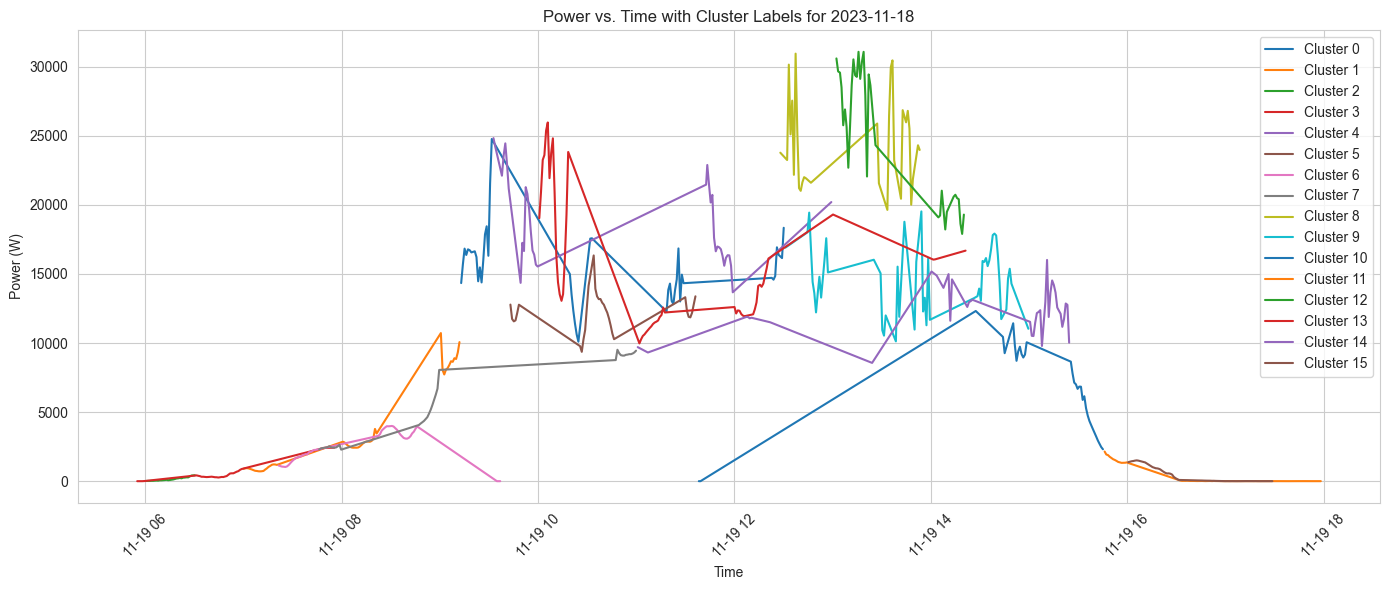

In [337]:
import matplotlib.pyplot as plt

# Assuming 'Time' column is already in datetime format
specific_date = '2023-11-19'

# Filter data for a specific date, for example, '2023-11-16'
specific_date_data = df_new[df_new['Time'].dt.date == pd.to_datetime(specific_date).date()]

# Create an empty DataFrame to store all cluster data
combined_data = pd.DataFrame(columns=['Time', 'Power(W)', 'Cluster_Labels'])

# Concatenate all cluster data into a single DataFrame
for cluster_label, cluster_data in specific_date_data.groupby('Cluster_Labels'):
    combined_data = pd.concat([combined_data, cluster_data[['Time', 'Power(W)', 'Cluster_Labels']]], ignore_index=True)

# Plot all clusters on one line chart
plt.figure(figsize=(14, 6))

# Group combined data by cluster label and plot each cluster separately with different colors
for cluster_label, cluster_data in combined_data.groupby('Cluster_Labels'):
    plt.plot(cluster_data['Time'], cluster_data['Power(W)'], label=f'Cluster {cluster_label}')

# Set labels and title
plt.xlabel("Time")
plt.ylabel("Power (W)")
plt.title("Power vs. Time with Cluster Labels for 2023-11-18")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


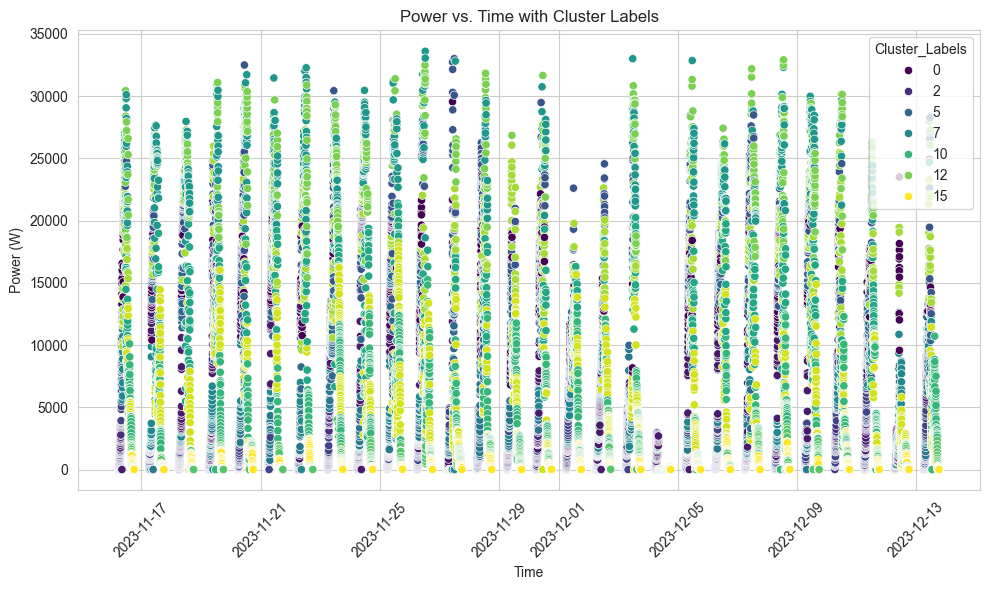

In [338]:
# Assuming your data is stored in a DataFrame called df

# Set the style
sns.set_style("whitegrid")

# Plot the data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_new, x="Time", y="Power(W)", hue="Cluster_Labels", palette="viridis")

# Set labels and title
plt.xlabel("Time")
plt.ylabel("Power (W)")
plt.title("Power vs. Time with Cluster Labels")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [14]:
df_new.to_csv('labled.csv', index=False)

In [15]:
# Save the SOM model to a file
joblib.dump(som, 'som_model.joblib')

['som_model.joblib']

In [15]:
# Load the trained SOM model
som = joblib.load('som_model.joblib')

In [350]:
new_data = [0,20.9,5,55]
# new_data = ['11.16.2023 14:40:34',5724,40.5]
# new_data[0] = pd.to_datetime(new_data[0], format='%m.%d.%Y %H:%M:%S')
# new_data[0] = round((new_data[0].timestamp() / 10**18),10)
# new_data = np.array(new_data).reshape(1,-1)

# new_data = scaler1.transform(new_data)

# print(new_data)

In [351]:
mapped_data_new = np.array([som.winner(d) for d in new_data])
cluster_labels_new = np.ravel_multi_index(mapped_data_new.T, (4, 4))
print(cluster_labels_new)

[10  8  8  8]


In [352]:
def find_bmu(input_data, som_model,scaler):
    # Ensure input_data is a 1D numpy array
    input_data = np.array(input_data).flatten()

    # Normalize the input data using the same scaler used for training
    normalized_input = scaler.transform(input_data.reshape(1, -1))

   # Normalize the weights of the SOM
    normalized_weights = som_model.get_weights() / np.linalg.norm(som_model.get_weights(), axis=-1, keepdims=True)

    # Calculate distances between normalized input_data and all neurons
    distances = np.linalg.norm(normalized_weights - normalized_input, axis=-1)
    # Find the index of the neuron with the smallest distance (BMU)
    bmu_index = np.unravel_index(np.argmin(distances, axis=None), distances.shape)
    return bmu_index

def predict_cluster(input_data, som_model,scaler):
    bmu_index = find_bmu(input_data, som_model,scaler)
    # Use the BMU index to determine the cluster
    predicted_cluster = assign_cluster_label(bmu_index ,som_model)
    return predicted_cluster

def visualize_som(input_data, som_model,scaler):
    bmu_index = find_bmu(input_data, som_model,scaler)

    # Visualize the SOM, highlighting the BMU
    plt.imshow(som_model.distance_map().T, cmap='bone_r', interpolation='none')
    plt.colorbar()

    # Highlight the BMU on the map
    plt.plot(bmu_index[0], bmu_index[1], 'rx', markersize=10, markeredgewidth=2)

    plt.show()

# Function to assign cluster labels (modify this based on your criteria)
def assign_cluster_label(bmu_index,som_model):
    # Example: You might use the coordinates of BMU as a label
    return bmu_index[0] * som_model._weights.shape[1] + bmu_index[1]


Predicted Cluster: 3
(0, 3)


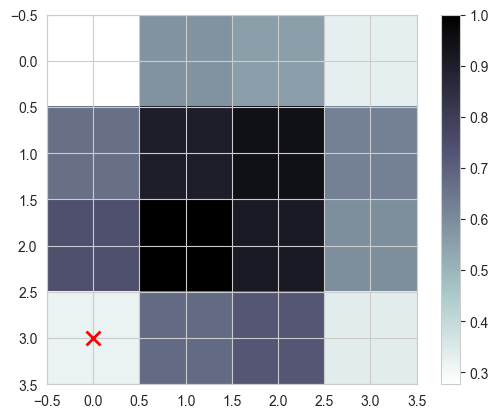

In [353]:
# Predict the cluster
predicted_cluster = predict_cluster(new_data, som,scaler1)
print(f"Predicted Cluster: {predicted_cluster}")
print(find_bmu(new_data, som,scaler1))

# Visualize the SOM with the BMU highlighted
visualize_som(new_data, som,scaler1)

In [354]:
# Save the SOM model to a file
joblib.dump(som, 'som_model.joblib')

['som_model.joblib']